# LAB-2: Exploratory Data Analysis (EDA) Lab Report – UPC Campus Nord data


**Exploratory Data Analysis (EDA)** is the process of **analyzing and investigating datasets** to summarize their main characteristics through **statistical graphics** and **data visualization techniques**.  


It is a critical first step in any data science project to:

- Understand the structure and content of the data  
- Identify patterns, trends, and relationships  
- Spot anomalies or data quality issues  
- Prepare the data for further modeling or hypothesis testing  


<mark>**EDA is not just about numbers, it’s about telling the story behind the data.**</mark>


---

The following images provides a complete steps of EDA. Not all of them have to be conducted. 

<img src="Figures/eda.jpg" alt="EDA steps" width="800">


---


### Objective of this Lab

Conduct an Exploratory Data Analysis on the dataset   `Campus_DiagonalNordUPC_data.xlsx`, which contains information about the **consumption of electricity, water resources, etc** of the **UPC Diagonal Nord Campus**.


The **goal** is to:
- Extract insights from the data  
- Identify patterns or anomalies  
- Visualize findings in a clear, meaningful way  

You are free to choose your **visualization style** and the **story you want to tell** through your analysis.  


*Tip:* Use this Jupyter Notebook to document your process. Combine **text (Markdown)**, **code**, and **visualizations** to build a clear and insightful narrative.

---


### Suggested Steps

1) Data Loading and Initial Exploration

- Load the dataset and display its structure (columns, data types, missing values, etc.)
    

2. Data Cleaning
- Handle missing, inconsistent, or incorrect data if necessary.
- Create new relevant variables or filters when useful
    

3. Exploratory Analysis

- Compute summary statistics and explore distributions. (week/weekends, monthly distributions, seasonal, etc).
- Look for correlations or relationships between variables.
- Detect and analyze anomalies or outliers and discuss possible causes

4. Data Visualization
 - Use appropriate plots to represent your findings clearly and effectively:
 
        - Line plots for time series
        - Bar charts for comparisons
        - Heatmaps for correlations
        - Boxplots for distributions

5. Insights and Conclusions
- Summarize your key findings
- Reflect on the main takeaways from your analysis




# **Lab Assignment 2: Exploratory Data Analysis (EDA)**

## **1. Dataset overview**

The dataset contains hourly measurements of **electricity**, **water**, and **gas consumption**, along with **exterior temperature**, recorded at UPC Campus Nord.  
Each variable is expressed in consistent engineering units (kWh, m³, °C).  
The dataset covers nearly one full year of operation, allowing observation of both **seasonal** and **weekly** variations.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# read the dataset
data = pd.read_excel(r"Campus_DiagonalNordUPC_data.xlsx")
print ("Shape of the dataset", data.shape)
print ("Columns:", data.columns.tolist()) #name of the dataset columns
print (data.dtypes) #type of the dataset columns

Shape of the dataset (9793, 6)
Columns: ['Date', 'Hour', 'Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Temperature exterior [Celsius]', 'Gas [kwh]']
Date                                datetime64[ns]
Hour                                datetime64[ns]
Electricity Campus DN [kWh]                  int64
Water consumption Campus DN [m3]           float64
Temperature exterior [Celsius]             float64
Gas [kwh]                                  float64
dtype: object


## **2. Descriptive statistics and data quality**

A summary of descriptive statistics confirms that all variables are complete and contain no missing values.  
Electricity and water consumption exhibit a wide dynamic range, while gas usage remains close to zero except during winter.  
Temperature data ranges roughly from **5 °C to 35 °C**, following a smooth annual pattern.


In [2]:
data.head() #first rows

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
0,2024-09-01 00:00:00,2024-09-01 00:00:00,741,0.797139,22.7,0.0
1,2024-09-01 01:00:00,2024-09-01 01:00:00,734,0.793457,22.5,0.0
2,2024-09-01 02:00:00,2024-09-01 02:00:00,735,0.768367,22.4,0.0
3,2024-09-01 03:00:00,2024-09-01 03:00:00,732,0.767533,22.1,0.0
4,2024-09-01 04:00:00,2024-09-01 04:00:00,729,0.784900,21.4,0.0


In [3]:
data.tail() #last rows

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
9788,2025-10-15 19:00:00,2025-10-15 19:00:00,1413,2.195682,18.2,0.0
9789,2025-10-15 20:00:00,2025-10-15 20:00:00,1283,4.113499,18.0,0.0
9790,2025-10-15 21:00:00,2025-10-15 21:00:00,1084,7.020899,17.9,0.0
9791,2025-10-15 22:00:00,2025-10-15 22:00:00,893,2.743192,16.9,0.0
9792,2025-10-15 23:00:00,2025-10-15 23:00:00,746,1.010154,17.2,0.0


In [4]:
data.describe() #Summary of the columns, for Date and Hour doesn't makes sense as their are not numeric

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
count,9793,9793,9793.000000,9793.000000,9793.000000,9793.000000
mean,2025-03-24 03:46:26.480139008,2025-03-24 03:46:26.480139008,1039.818952,2.711848,17.350985,7.948224
min,2024-09-01 00:00:00,2024-09-01 00:00:00,0.000000,0.277742,1.000000,0.000000
25%,2024-12-11 23:00:00,2024-12-11 23:00:00,738.000000,1.103867,12.100000,0.000000
50%,2025-03-23 23:00:00,2025-03-23 23:00:00,853.000000,1.949100,17.000000,0.000000
75%,2025-07-04 00:00:00,2025-07-04 00:00:00,1338.000000,3.913985,22.200000,0.000000
max,2025-10-15 23:00:00,2025-10-15 23:00:00,2875.000000,18.637224,37.000000,197.353000
std,NaN,NaN,377.519473,2.054874,6.862379,22.615322


In [5]:
data.isna().sum() # Count of missing values

Date                                0
Hour                                0
Electricity Campus DN [kWh]         0
Water consumption Campus DN [m3]    0
Temperature exterior [Celsius]      0
Gas [kwh]                           0
dtype: int64

In [8]:
#no missing values are found

In [9]:
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.day_name()

# Weekday and month are obtained from the Date variable, for potentially useful features. 
data[['Month',  'Weekday']].head()

,Month,Weekday
0,9,Sunday
1,9,Sunday
2,9,Sunday
3,9,Sunday
4,9,Sunday


In [10]:
data

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],Month,Weekday
0,2024-09-01 00:00:00,2024-09-01 00:00:00,741,0.797139,22.7,0.0,9,Sunday
1,2024-09-01 01:00:00,2024-09-01 01:00:00,734,0.793457,22.5,0.0,9,Sunday
2,2024-09-01 02:00:00,2024-09-01 02:00:00,735,0.768367,22.4,0.0,9,Sunday
3,2024-09-01 03:00:00,2024-09-01 03:00:00,732,0.767533,22.1,0.0,9,Sunday
4,2024-09-01 04:00:00,2024-09-01 04:00:00,729,0.784900,21.4,0.0,9,Sunday
...,...,...,...,...,...,...,...,...
9788,2025-10-15 19:00:00,2025-10-15 19:00:00,1413,2.195682,18.2,0.0,10,Wednesday
9789,2025-10-15 20:00:00,2025-10-15 20:00:00,1283,4.113499,18.0,0.0,10,Wednesday
9790,2025-10-15 21:00:00,2025-10-15 21:00:00,1084,7.020899,17.9,0.0,10,Wednesday
9791,2025-10-15 22:00:00,2025-10-15 22:00:00,893,2.743192,16.9,0.0,10,Wednesday


In [11]:
# The column Hour is turn into a number instead of a datetime 
data['Hour'] = data['Date'].dt.hour
data

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],Month,Weekday
0,2024-09-01 00:00:00,0,741,0.797139,22.7,0.0,9,Sunday
1,2024-09-01 01:00:00,1,734,0.793457,22.5,0.0,9,Sunday
2,2024-09-01 02:00:00,2,735,0.768367,22.4,0.0,9,Sunday
3,2024-09-01 03:00:00,3,732,0.767533,22.1,0.0,9,Sunday
4,2024-09-01 04:00:00,4,729,0.784900,21.4,0.0,9,Sunday
...,...,...,...,...,...,...,...,...
9788,2025-10-15 19:00:00,19,1413,2.195682,18.2,0.0,10,Wednesday
9789,2025-10-15 20:00:00,20,1283,4.113499,18.0,0.0,10,Wednesday
9790,2025-10-15 21:00:00,21,1084,7.020899,17.9,0.0,10,Wednesday
9791,2025-10-15 22:00:00,22,893,2.743192,16.9,0.0,10,Wednesday


In [12]:
data.describe()

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],Month
count,9793,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000
mean,2025-03-24 03:46:26.480139008,11.501174,1039.818952,2.711848,17.350985,7.948224,6.824466
min,2024-09-01 00:00:00,0.000000,0.000000,0.277742,1.000000,0.000000,1.000000
25%,2024-12-11 23:00:00,6.000000,738.000000,1.103867,12.100000,0.000000,4.000000
50%,2025-03-23 23:00:00,12.000000,853.000000,1.949100,17.000000,0.000000,7.000000
75%,2025-07-04 00:00:00,18.000000,1338.000000,3.913985,22.200000,0.000000,10.000000
max,2025-10-15 23:00:00,23.000000,2875.000000,18.637224,37.000000,197.353000,12.000000
std,NaN,6.923162,377.519473,2.054874,6.862379,22.615322,3.377877


## **3. Visual exploration**

A series of histograms, boxplots, and density plots were used to visualize the distributions.  
These highlight the right-skewed nature of electricity and gas consumption, confirming the presence of **high-value peaks** likely due to operational intensity.

Boxplots show:
- Electricity and water have **moderate variability** with a few high-end outliers.  
- Gas usage shows **many outliers**, corresponding to heating peaks.  
- Temperature displays a **balanced distribution** without strong skewness.

Electricity Campus DN [kWh]: min=0, max=2875
Water consumption Campus DN [m3]: min=0.277742405063536, max=18.6372235242899
Gas [kwh]: min=0.0, max=197.353


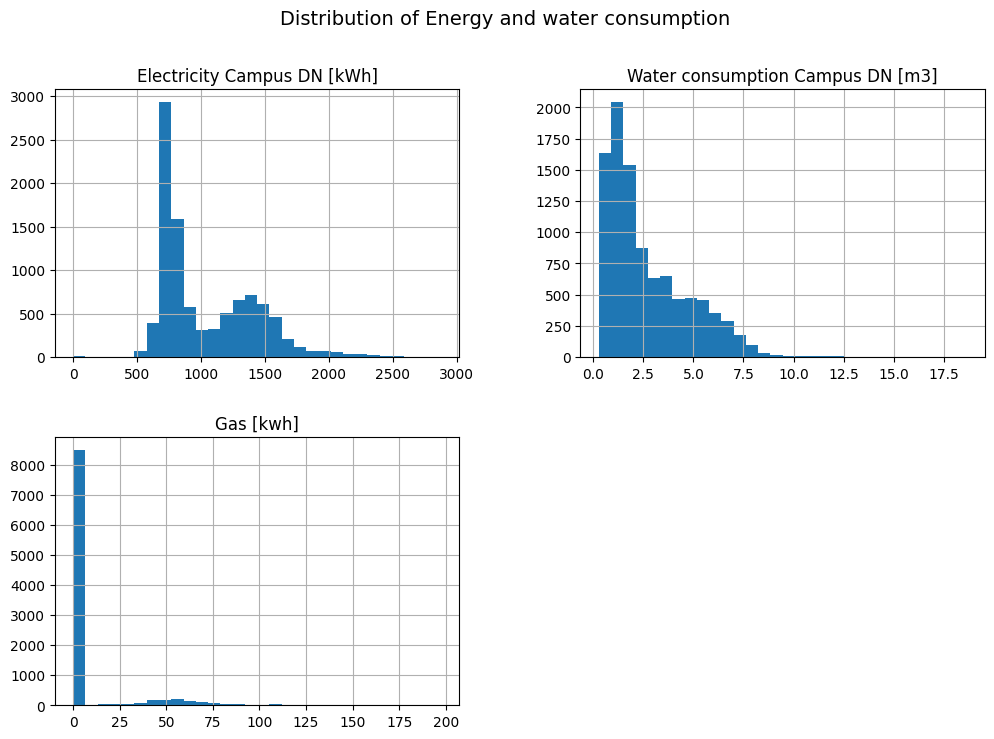

In [14]:
# Minimum and maximum values for the energy and water columns
for col in ['Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Gas [kwh]']: 
    if col in data.columns:
       print(f"{col}: min={data[col].min()}, max={data[col].max()}")

# Histogram for the energy and water columns
data[['Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Gas [kwh]']].hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of Energy and water consumption', fontsize=14)
plt.show()

In [ ]:
#First impressions:
    #Electricity has a maximum higher than 2 times the 50% vaule, check for outlier (peak days)
    #Water seems to have a high variability
    #Temperature seems normal
    #Gas is not generally use

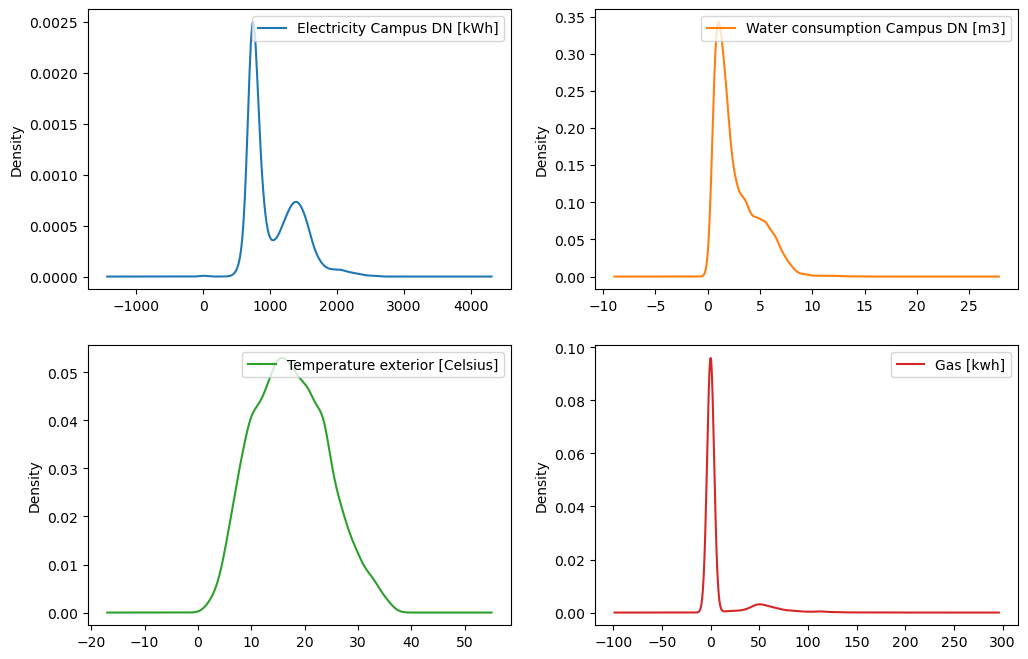

In [10]:
#density plots
cols = ['Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Temperature exterior [Celsius]', 'Gas [kwh]']
axes = data[cols].plot(kind='kde', subplots=True, layout=(2,2),
                       figsize=(12,8), sharex=False, legend=True)
#Modify the position of legend
for ax_row in axes:
    for ax in ax_row:
        if ax is not None:
            ax.legend(loc='upper right')

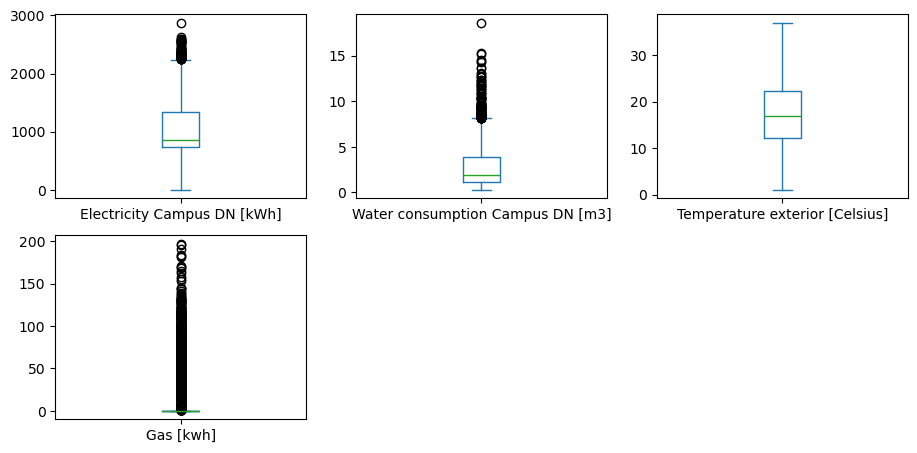

In [11]:
#boxplots
atributos_boxplot = data[cols].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False, sharey=False, fontsize=10)

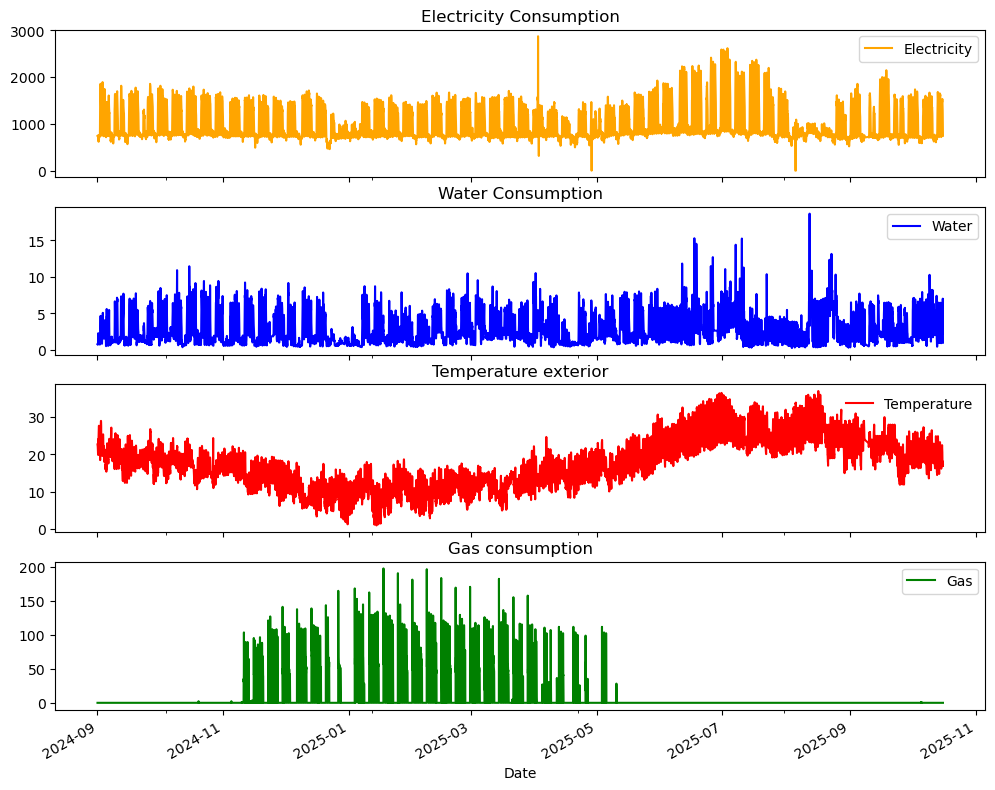

In [12]:
#Changes over time
fig, axes = plt.subplots(4, 1, figsize=(12,10), sharex=True)
data.set_index('Date')['Electricity Campus DN [kWh]'].plot(ax=axes[0], color='orange', label='Electricity')
axes[0].set_title('Electricity Consumption')
axes[0].legend()
data.set_index('Date')['Water consumption Campus DN [m3]'].plot(ax=axes[1], color='blue', label='Water')
axes[1].set_title('Water Consumption')
axes[1].legend()
data.set_index('Date')['Temperature exterior [Celsius]'].plot(ax=axes[2], color='red', label='Temperature')
axes[2].set_title('Temperature exterior')
axes[2].legend(loc='upper right',frameon=False)
data.set_index('Date')['Gas [kwh]'].plot(ax=axes[3], color='green', label='Gas')
axes[3].set_title('Gas consumption')
axes[3].legend()

Valleys in water and electricity consumption coincide with the winter and summer holiday periods.

As the temperature increases, there is a noticeable rise in electricity consumption, likely due to air conditioning, and a smaller increase in water usage.
As consumption clearly follows the winter, as it is mainly used for heating. The negative peaks correspond to weekends, when no class are taught.

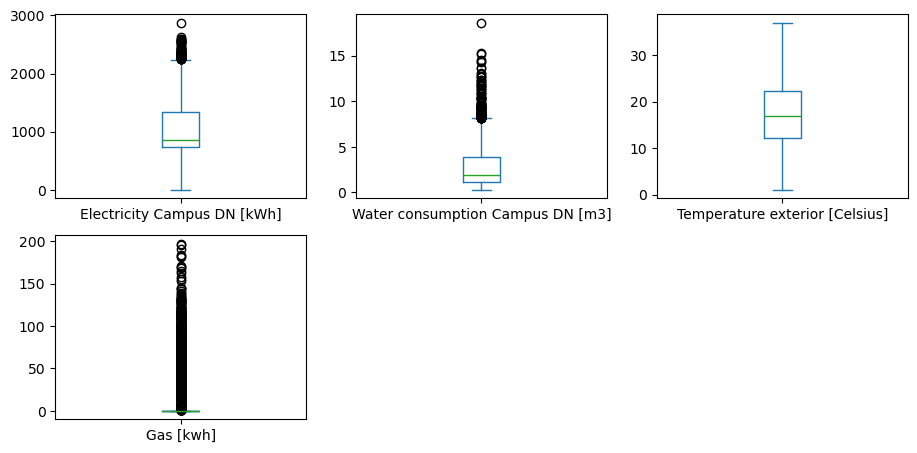

In [13]:
#boxplots
boxplot = data[cols].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False, sharey=False, fontsize=10)

In [14]:
#Gas has a lot of ouliers but that is because normally the heating is not turned on.
#Temperature resambles a normal distribution so during the study period there were no days out of the ordinary
#Lets clean the water consumption as it clearly shows an outlier (could be a leak or maintenance day for watering the campus)

#using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


df_no_outliers_iqr = remove_outliers_iqr(data, 'Water consumption Campus DN [m3]')

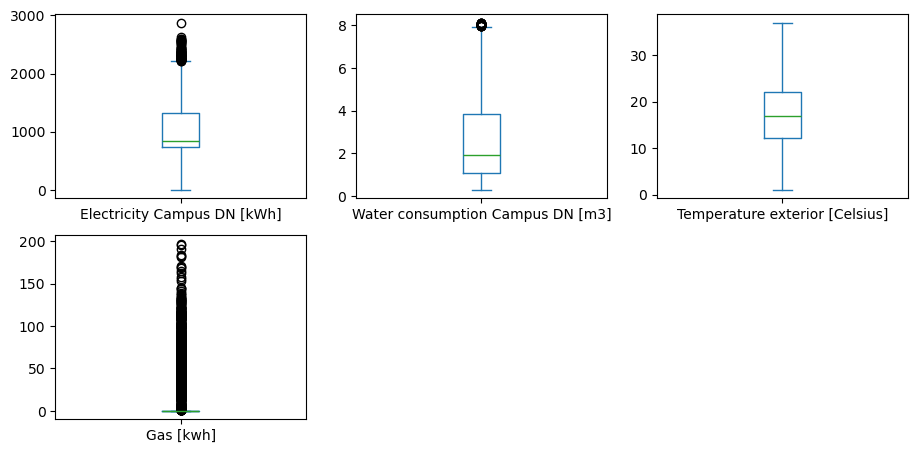

In [15]:
boxplot_clean = df_no_outliers_iqr[cols].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False, sharey=False, fontsize=10)

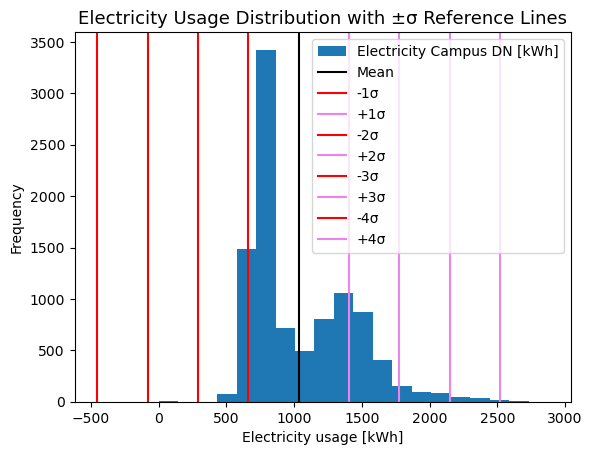

In [16]:
#There is still an outlier in electricity use, lets use a broad Z-Score Method
#a broader Z-score because the electricity usage is right skewed so it would cut a lot of real high spikes, seems more reasonable as to not lose seasonal events
#removing 3σ data points seems a bit overcleaning

mean = df_no_outliers_iqr['Electricity Campus DN [kWh]'].mean()
st_dev = df_no_outliers_iqr['Electricity Campus DN [kWh]'].std()
data['Electricity Campus DN [kWh]'].plot.hist(bins=20)
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - 1*st_dev, color = 'Red', label = '-1σ')
plt.axvline(mean + 1*st_dev, color = 'Violet', label = '+1σ')
plt.axvline(mean - 2*st_dev, color = 'Red', label = '-2σ')
plt.axvline(mean + 2*st_dev, color = 'Violet', label = '+2σ')
plt.axvline(mean - 3*st_dev, color = 'Red', label = '-3σ')
plt.axvline(mean + 3*st_dev, color = 'Violet', label = '+3σ')
plt.axvline(mean - 4*st_dev, color = 'Red', label = '-4σ')
plt.axvline(mean + 4*st_dev, color = 'Violet', label = '+4σ')
plt.xlabel('Electricity usage')
plt.title("Electricity Usage Distribution with ±σ Reference Lines", fontsize=13)
plt.xlabel("Electricity usage [kWh]")
plt.ylabel("Frequency")
plt.legend()

In [17]:
#using a 3.5σ seems fit without overcleaning
from scipy.stats import zscore


def remove_outliers_zscore_broad(data, column):
    z_scores = zscore(data[column])
    print(z_scores)
    return data[(z_scores > -3.5) & (z_scores < 3.5)]
#data already without missing values
df_no_outliers_zscore_broad = remove_outliers_zscore_broad(df_no_outliers_iqr, 'Electricity Campus DN [kWh]')


[-0.78693433 -0.805782   -0.80308948 ...  0.13660153 -0.37767062
 -0.77347171]


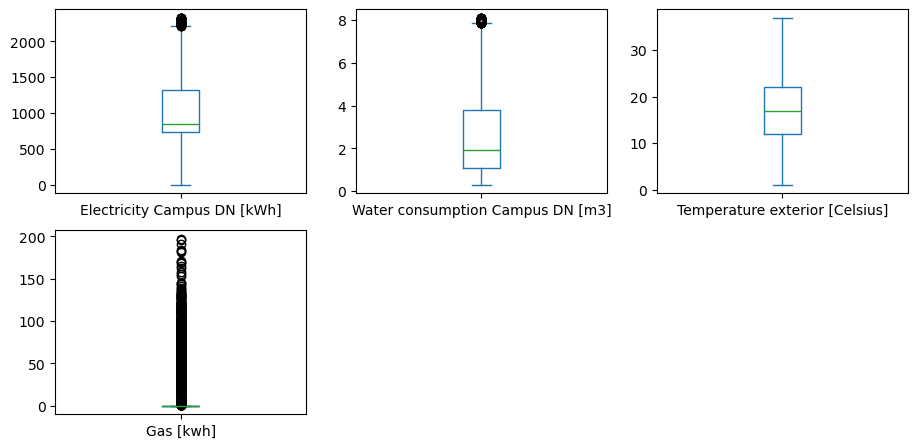

In [18]:
boxplot_clean_2 = df_no_outliers_zscore_broad[cols].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False, sharey=False, fontsize=10)

In [19]:
# detect anomalies in database 

anomalies = data[(data['Water consumption Campus DN [m3]'] > data['Water consumption Campus DN [m3]'].quantile(0.99)) |
                 (data['Electricity Campus DN [kWh]'] > data['Electricity Campus DN [kWh]'].quantile(0.99)) |
                 (data['Gas [kwh]'] > data['Gas [kwh]'].quantile(0.99))]
anomalies


,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],Month,Weekday
733,2024-10-01 13:00:00,13,1748,8.479750,22.7,0.0,10,Tuesday
926,2024-10-09 14:00:00,14,1593,10.913067,22.3,0.0,10,Wednesday
1068,2024-10-15 12:00:00,12,1714,11.448916,20.5,0.0,10,Tuesday
1069,2024-10-15 13:00:00,13,1759,8.776883,20.9,0.0,10,Tuesday
1072,2024-10-15 16:00:00,16,1613,8.666949,22.2,0.0,10,Tuesday
...,...,...,...,...,...,...,...,...
8589,2025-08-24 21:00:00,21,754,8.348933,25.0,0.0,8,Sunday
8590,2025-08-24 22:00:00,22,743,10.310450,24.0,0.0,8,Sunday
9636,2025-10-09 11:00:00,11,1630,10.277267,24.3,0.0,10,Thursday
9637,2025-10-09 12:00:00,12,1626,8.926365,25.1,0.0,10,Thursday


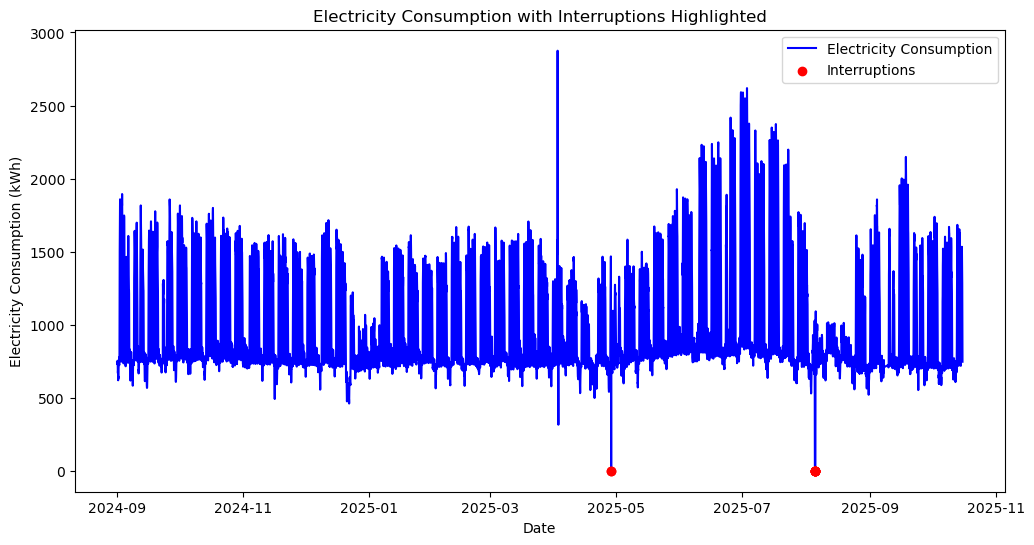

Electricity Interruptions Dates:
                    Date  Electricity Campus DN [kWh]
5749 2025-04-28 13:00:00                            0
5750 2025-04-28 14:00:00                            0
8120 2025-08-05 08:00:00                            0
8121 2025-08-05 09:00:00                            0
8122 2025-08-05 10:00:00                            0
8123 2025-08-05 11:00:00                            0
8124 2025-08-05 12:00:00                            0
8125 2025-08-05 13:00:00                            0
8126 2025-08-05 14:00:00                            0
8127 2025-08-05 15:00:00                            0


In [20]:
# check when electricity interruptions happened (hours with very low or zero consumption)
electricity_interruptions = data[data['Electricity Campus DN [kWh]'] < 30]  

# create a plot to visualize electricity interruptions over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Electricity Campus DN [kWh]'], label='Electricity Consumption', color='blue')
plt.scatter(electricity_interruptions['Date'], electricity_interruptions['Electricity Campus DN [kWh]'], color='red', label='Interruptions', zorder=5)
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (kWh)')
plt.title('Electricity Consumption with Interruptions Highlighted')
plt.legend()
plt.show()

# indicate the dates of interruptions
print("Electricity Interruptions Dates:")
print(electricity_interruptions[['Date', 'Electricity Campus DN [kWh]']])
#)





what happened in these days? 

On April 28th, 2025, a major power outage (Apagón) occurred, causing a drop in electricity, disrupting normal campus operations and highlighting system vulnerability for many hours.

Another drop to 0 kWh appears on August 5th, with no immediate explanation. It could be a data recording issue or a temporary shutdown, requiring further verification.


## **4. Correlation and interpretation**

A correlation heatmap shows:
- **Electricity ↔ Water:** strong positive correlation → higher occupancy and activity levels.  
- **Temperature ↔ Gas:** strong negative correlation → heating in cold periods, no use in summer.  
- **Electricity ↔ Temperature:** mild positive correlation → cooling demand increases with warmer conditions.

In [26]:
#check if there anomalies on 5th august, other than 

,Temperature exterior [Celsius],Electricity Campus DN [kWh],Water consumption Campus DN [m3],Gas [kwh]
Temperature exterior [Celsius],1.000000,0.227189,0.222377,-0.469062
Electricity Campus DN [kWh],0.227189,1.000000,0.678098,-0.122542
Water consumption Campus DN [m3],0.222377,0.678098,1.000000,-0.149185
Gas [kwh],-0.469062,-0.122542,-0.149185,1.000000


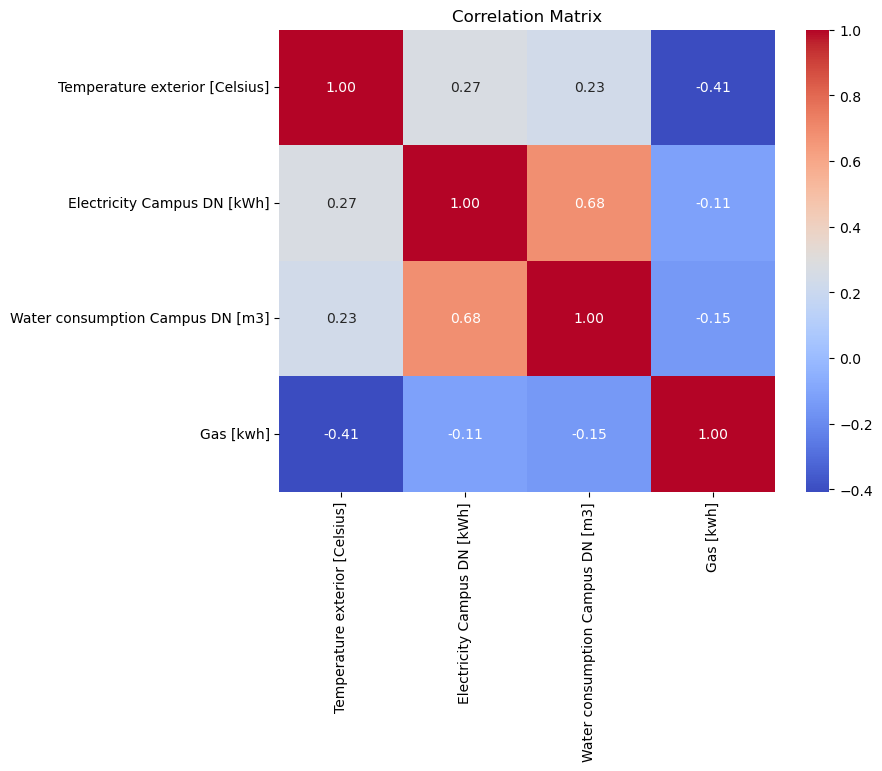

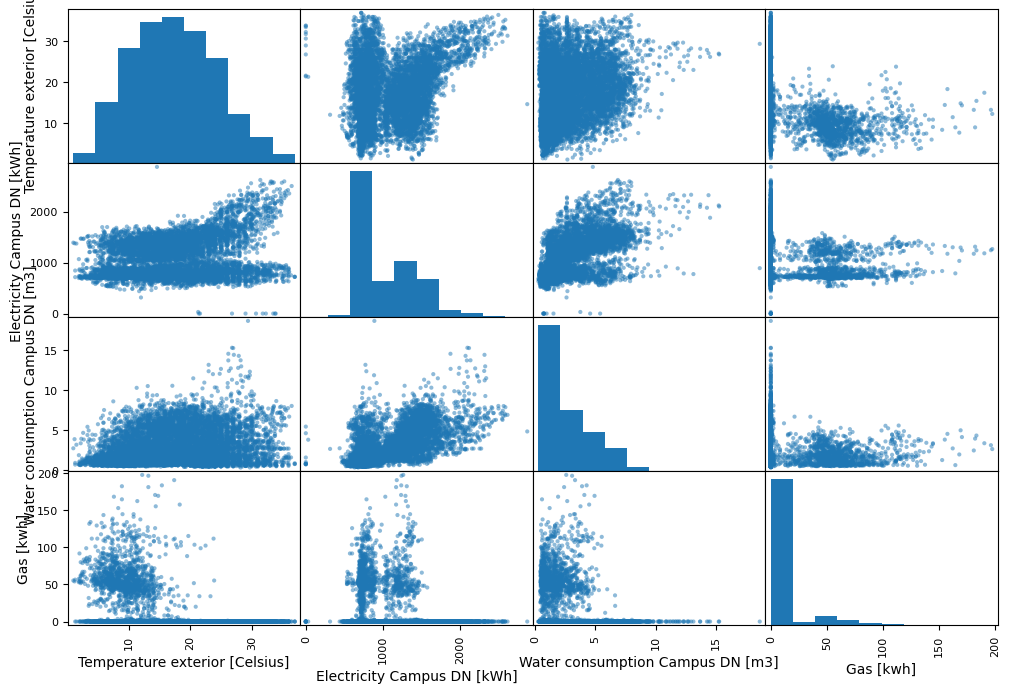

In [21]:
# other interesting analysis can be done 
# for example, correlation analysis between temperature and energy consumption
correlation_matrix = data[['Temperature exterior [Celsius]', 'Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Gas [kwh]']].corr()
correlation_matrix

# plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# pearson correlation coefficients
pearson_corr = data[['Temperature exterior [Celsius]', 'Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Gas [kwh]']].corr(method='pearson')

# check more insights about correlation, with scatter plots
scatter_matrix = pd.plotting.scatter_matrix(data[['Temperature exterior [Celsius]', 'Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Gas [kwh]']], figsize=(12, 8))

# spearman correlation
spearman_corr = data[['Temperature exterior [Celsius]', 'Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Gas [kwh]']].corr(method='spearman')
spearman_corr


From the correlation matrix we can see that:

Electricity and water consumption are positively correlated as they tend to increase and decrease together.

Gas consumption is slightly negatively correlated with temperature — when the outside temperature rises, gas usage likely for heating goes down.

While from the scatter plots, we can notice:

Two distinct patterns in electricity consumption, possibly reflecting different operational modes (e.g., weekdays vs weekends, or academic vs vacation periods).

In the upper range of temperature and electricity, there is a proportional trend — as temperature increases, electricity also rises, probably due to air conditioning use.



,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
count,9793.000000,9793.000000,9793.000000,9793.000000
mean,1039.818952,2.711848,17.350985,7.948224
std,377.519473,2.054874,6.862379,22.615322
min,0.000000,0.277742,1.000000,0.000000
25%,738.000000,1.103867,12.100000,0.000000
50%,853.000000,1.949100,17.000000,0.000000
75%,1338.000000,3.913985,22.200000,0.000000
max,2875.000000,18.637224,37.000000,197.353000


,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
is_weekend,,,,
False,1161.742448,3.146707,17.362147,6.441032
True,736.529915,1.630123,17.323219,11.697416


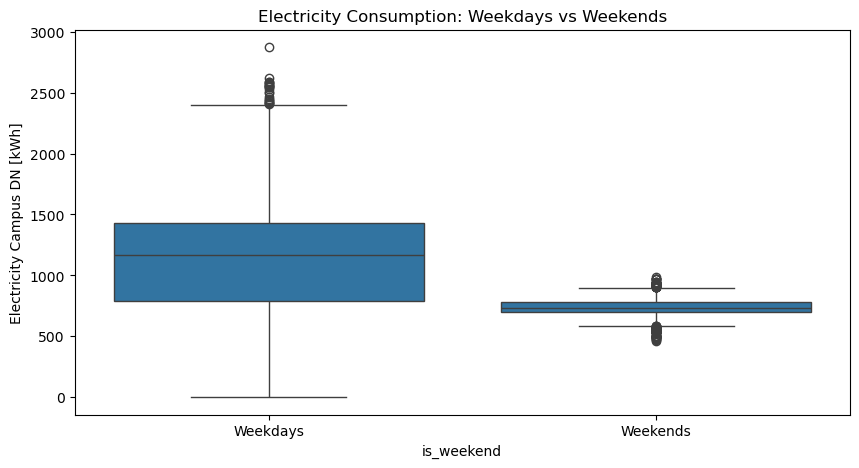

,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
Season,,,,
Autumn,1056.232132,2.772646,18.331697,2.377547
Spring,989.454010,2.814828,15.130856,9.166756
Summer,1111.515851,2.860623,25.744067,0.000000
Winter,993.537037,2.363970,9.578750,23.127304


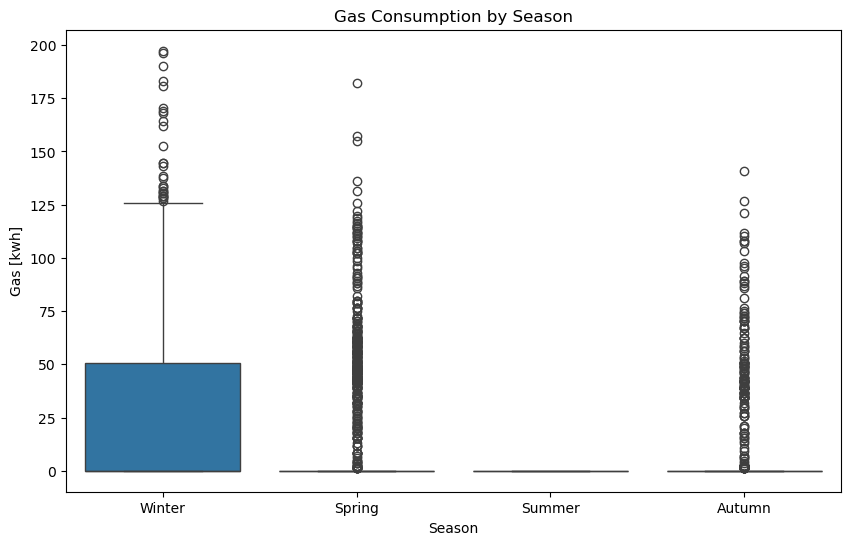

In [22]:
cols = ['Electricity Campus DN [kWh]', 
        'Water consumption Campus DN [m3]', 
        'Temperature exterior [Celsius]', 
        'Gas [kwh]']

# --- 1. Summary statistics ---
summary_stats = data[cols].describe()
display(summary_stats)

# --- 2. Weekday vs Weekend ---
data['is_weekend'] = data['Weekday'].isin(['Saturday', 'Sunday'])

weekend_stats = data.groupby('is_weekend')[cols].mean()
display(weekend_stats)

plt.figure(figsize=(10,5))
sns.boxplot(x='is_weekend', y='Electricity Campus DN [kWh]', data=data)
plt.xticks([0,1], ['Weekdays','Weekends'])
plt.title('Electricity Consumption: Weekdays vs Weekends')
plt.show()


# --- 4. Seasonal analysis ---
# Map months to seasons
season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
              3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer',
              9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}

data['Season'] = data['Month'].map(season_map)

seasonal_stats = data.groupby('Season')[cols].mean()
display(seasonal_stats)

plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Gas [kwh]', data=data,
            order=['Winter','Spring','Summer','Autumn'])
plt.title('Gas Consumption by Season')
plt.xlabel('Season')
plt.show()




## **4. Observations**

The dataset represents hourly energy and environmental measurements at **UPC Campus Nord**, including electricity, water, and gas consumption, as well as exterior temperature.

**General statistics** show that electricity consumption averages around **1,040 kWh/h**, with peaks reaching **2,875 kWh**, indicating substantial variability across time. Water usage remains relatively steady, except for occasional spikes likely related to specific campus activities. Gas consumption, in contrast, is highly intermittent — nearly zero for most of the year but rising sharply during the winter months for heating purposes.

**Seasonal and weekly patterns** are clearly visible. Electricity and water demand are higher during weekdays and drop significantly on weekends, aligning with typical operational schedules of academic buildings. During summer, electricity use increases, most likely due to cooling loads, whereas gas consumption peaks in colder months to maintain indoor comfort levels.

The **temperature variable** shows a smooth annual cycle ranging roughly from **5 °C in winter to 35 °C in summer**, strongly influencing energy patterns. Electricity and temperature show a **positive relationship**, while temperature and gas usage are **strongly inversely correlated**.  
Overall, the analysis reveals that electricity and water consumption follow occupancy-driven dynamics, while gas usage reflects seasonal heating demand. These insights provide a clear basis for further forecasting and anomaly detection tasks.


In [23]:
print (data.dtypes)

Date                                datetime64[ns]
Hour                                         int32
Electricity Campus DN [kWh]                  int64
Water consumption Campus DN [m3]           float64
Temperature exterior [Celsius]             float64
Gas [kwh]                                  float64
Month                                        int32
Weekday                                     object
is_weekend                                    bool
Season                                      object
dtype: object


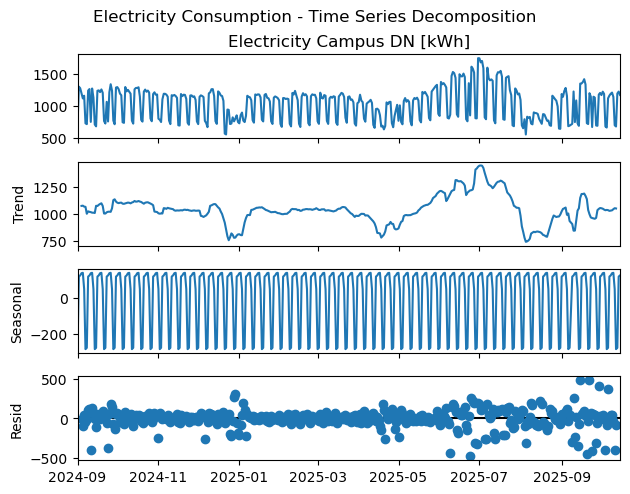

In [24]:
# Create a temporary copy to avoid modifying 'data'
df_temp = data.copy()

# Set Date as index (temporarily)
df_temp = df_temp.set_index('Date').sort_index()

# Aggregate to daily mean
daily_elec = df_temp['Electricity Campus DN [kWh]'].resample('D').mean()

# Drop missing days if any
daily_elec = daily_elec.dropna()

# Decompose the time series (trend, seasonality, residual)
decomp = seasonal_decompose(daily_elec, period=7 )  # weekly pattern
decomp.plot()
plt.suptitle('Electricity Consumption - Time Series Decomposition', y=1.02)
plt.show()


<Figure size 1000x500 with 0 Axes>

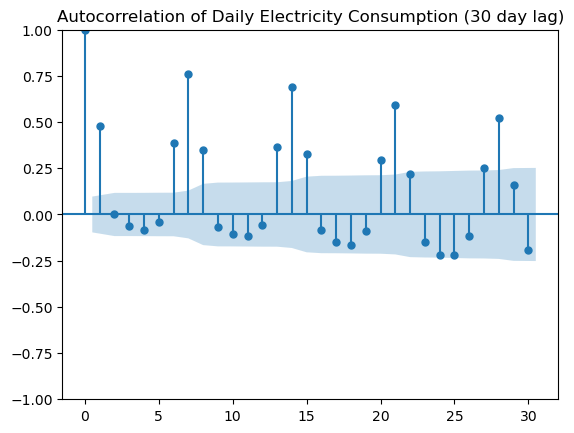

<Figure size 1000x500 with 0 Axes>

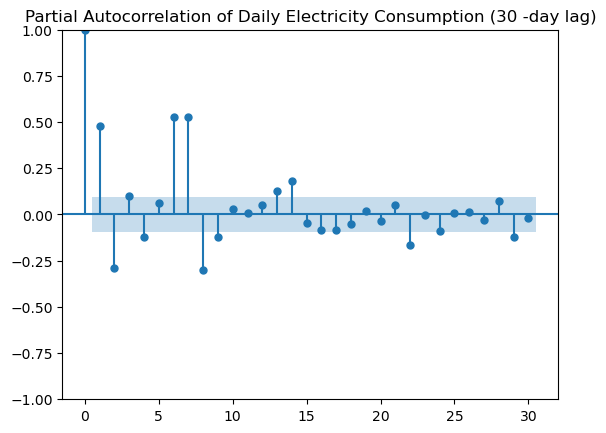

In [25]:
# Create temporary copy to avoid index issues
df_temp = data.copy()

# Ensure Date is datetime and index
if not pd.api.types.is_datetime64_any_dtype(df_temp['Date']):
    df_temp['Date'] = pd.to_datetime(df_temp['Date'], errors='coerce')
df_temp = df_temp.set_index('Date').sort_index()

# Aggregate to daily mean
daily_elec = df_temp['Electricity Campus DN [kWh]'].resample('D').mean().dropna()

# Plot autocorrelation (ACF)
plt.figure(figsize=(10,5))
plot_acf(daily_elec, lags=30)
plt.title('Autocorrelation of Daily Electricity Consumption (30 day lag)')
plt.show()

# Optional: Partial autocorrelation (PACF)
plt.figure(figsize=(10,5))
plot_pacf(daily_elec, lags=30, method='ywm')
plt.title('Partial Autocorrelation of Daily Electricity Consumption (30 -day lag)')
plt.show()

## **5. Understanding ACF and PACF**

The **Autocorrelation Function (ACF)** measures how much a time-series value at time *t* is correlated with its past values at different lags *k*. Mathematically, it is defined as:

$$
\rho(k) = \frac{\text{Cov}(Y_t, Y_{t-k})}{\sigma^2}
$$

where  
- *Yₜ* is the value at time *t*,  
- *σ²* is the variance of the series.

The ACF captures both **direct and indirect correlations**.  
For example, if electricity consumption on day *t* depends on day *t−1*, and day *t−1* depends on day *t−2*, then ACF at lag 2 (t vs t−2) will still show correlation, even if it is only indirect through day *t−1*.

The **Partial Autocorrelation Function (PACF)** removes these intermediate effects. It measures the correlation between *Yₜ* and *Yₜ₋ₖ* after controlling for all shorter lags. Mathematically:

$$
\phi(k,k) = \text{Corr}(Y_t, Y_{t-k} \mid Y_{t-1}, Y_{t-2}, ..., Y_{t-k+1})
$$

PACF therefore shows only the **direct influence** of observations *k* periods apart, without interference from intermediate dependencies.

**Summary:**
- **ACF** → captures total correlation (direct + indirect)  
- **PACF** → captures direct correlation after removing intermediate effects  
- A strong spike at **lag 1** indicates day-to-day dependence  
- A secondary spike at **lag 7** reveals a **weekly repeating pattern**

## **6. Time-series analysis**

Hourly electricity consumption was aggregated into **daily averages** and decomposed into **trend, seasonal, and residual components** using a 7-day period to capture weekly patterns.

The **STL decomposition** reveals three main insights:
1. **Trend:** Electricity use gradually increases during summer months, driven by **cooling loads** and extended campus activities.  
2. **Seasonality:** A consistent **weekly cycle** is observed, with higher consumption on weekdays and lower on weekends, aligning with normal campus operation.  
3. **Residuals:** Short-term fluctuations are centered around zero with relatively stable variance, suggesting no major anomalies.

The **ACF** and **PACF** plots confirm strong **weekly periodicity** with significant correlations at **lags 7, 14, and 21**, supporting the suitability of a **seasonal ARIMA model (s = 7)** for forecasting.  
These findings highlight distinct operational and climatic influences on campus energy use, forming a robust basis for further predictive modeling and energy optimization.

